Filtering a signal introduces a delay. Finite Impulse Response (FIR)-filters, are good because they preserve the shape of a signal.

## Butterworth filters

In [1]:
%matplotlib widget
import numpy as np
import scipy as sc, scipy.signal, scipy.integrate
import matplotlib.pyplot as plt

In [2]:
Fs = 1000.
dt = 1. / Fs


In [11]:
t = np.arange(0, Fs * 10.) / Fs

(0.0, 0.5)

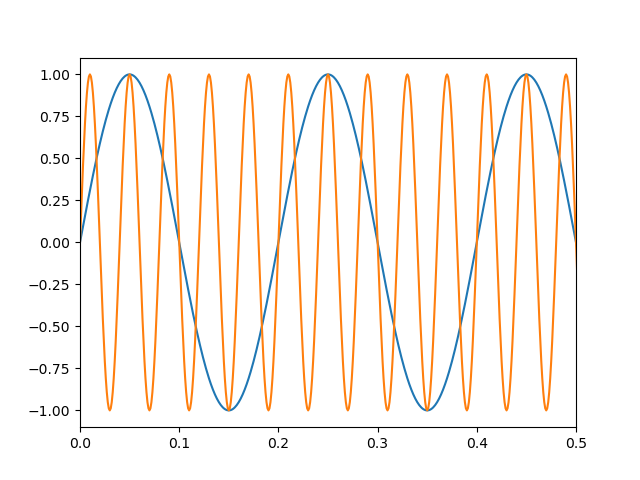

In [12]:
s0 = np.sin(5 * 2*np.pi * t) # 5 Hz
s1 = np.sin(25 * 2*np.pi * t) # 25 Hz

plt.figure()
plt.plot(t, s0, label='5 Hz')
plt.plot(t, s1, label='25 Hz')
plt.xlim([0, .5])

(5.0, 5.5)

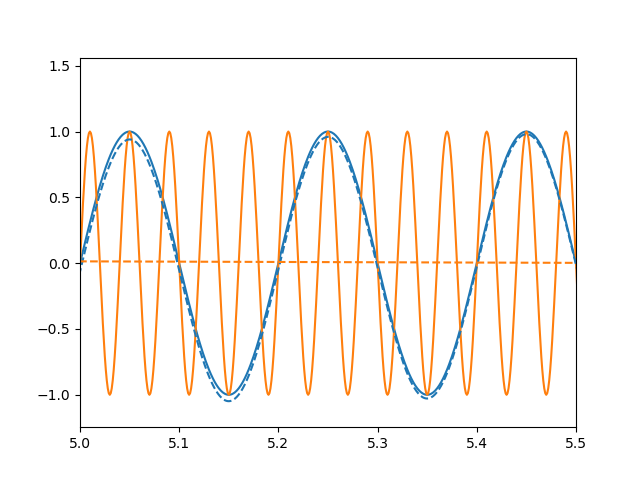

In [15]:
# Create Butterworth-filter
sos = sc.signal.butter(10, [0.1, 7], 'bandpass', fs=Fs, output='sos')
s0f = sc.signal.sosfiltfilt(sos, s0)
s1f = sc.signal.sosfiltfilt(sos, s1)

plt.figure()
plt.plot(t, s0, label='5 Hz')
plt.plot(t, s1, label='25 Hz')
plt.plot(t, s0f, '--', color='C0', label='5 Hz')
plt.plot(t, s1f, '--', color='C1', label='25 Hz')
plt.xlim([5, 5.5])

Looks good, not much delay. But there are edge effects.

(0.0, 0.5)

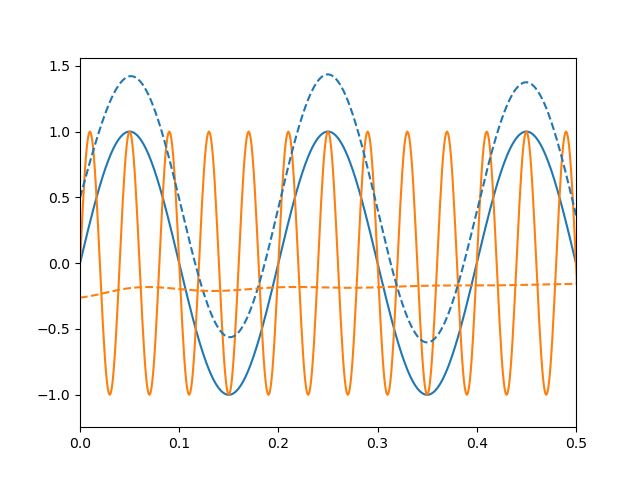

In [17]:
plt.figure()
plt.plot(t, s0, label='5 Hz')
plt.plot(t, s1, label='25 Hz')
plt.plot(t, s0f, '--', color='C0', label='5 Hz')
plt.plot(t, s1f, '--', color='C1', label='25 Hz')
plt.xlim([0, .5])

(0.0, 0.5)

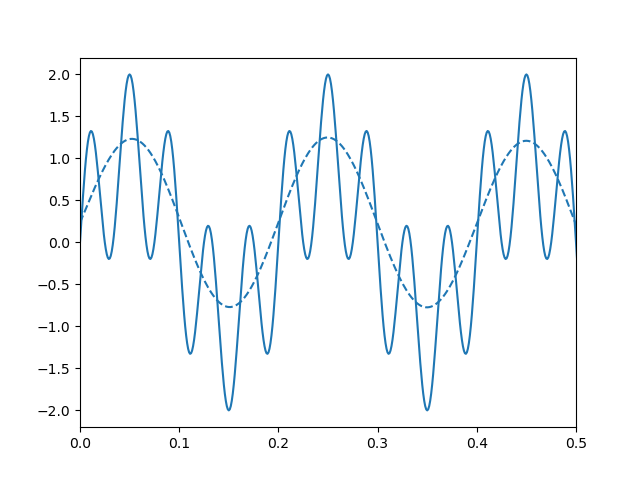

In [19]:
# Combined
s = s0 + s1

sf = sc.signal.sosfiltfilt(sos, s)
plt.figure()
plt.plot(t, s, label='5 + 25 Hz')
plt.plot(t, sf, '--', color='C0', label='5 + 25 Hz')
plt.xlim([0, .5])

/tmp/ipykernel_340429/2924918483.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


(0.0, 0.5)

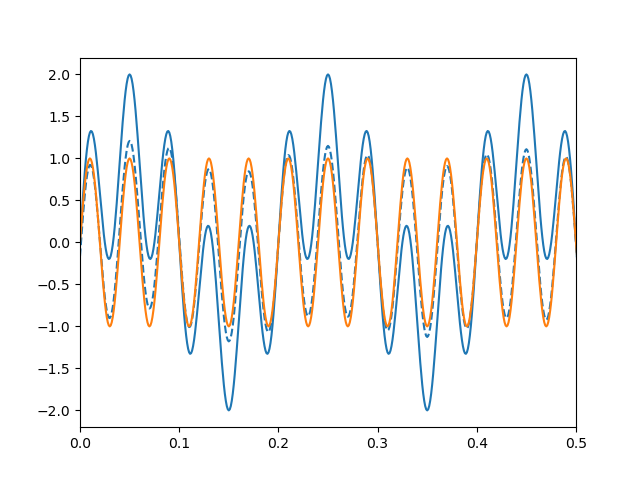

In [27]:
sos2 = sc.signal.butter(10, [5.5, 50], 'bandpass', fs=Fs, output='sos')
sf2 = sc.signal.sosfiltfilt(sos2, s)
plt.figure()
plt.plot(t, s, label='5 + 25 Hz')
plt.plot(t, sf2, '--', color='C0', label='5 + 25 Hz')
plt.plot(t, s1 , color='C1', label='5 + 25 Hz')
plt.xlim([0, .5])